# N-grams analysis

In [37]:
import chess
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
from collections import Counter
from typing import List, Tuple
import seaborn as sns
sns.set_theme()

Connection to database

In [38]:
conn = sqlite3.connect("chess_games.db")
cursor = conn.cursor()

Query to find all the moves

In [39]:
moves = cursor.execute("SELECT move FROM moves").fetchall()

Remove the promotions

In [40]:
# remove the fifth character if present
moves = [move[0][:4] for move in moves]

In [41]:
def most_common_ngrams(moves: List[str], n: int, top_k: int = 10) -> List[Tuple[Tuple[str], int]]:
    ngrams = (tuple(moves[i:i+n]) for i in range(len(moves) - n + 1))
    counter = Counter(ngrams)
    return counter.most_common(top_k)


Let's try producing the top 5 5-grams

In [42]:
top_ngrams = most_common_ngrams(moves, n=5, top_k=5)
print(top_ngrams)

[(('d2d4', 'c5d4', 'f3d4', 'g8f6', 'b1c3'), 5549), (('e2e4', 'c7c5', 'g1f3', 'd7d6', 'd2d4'), 4581), (('c7c5', 'g1f3', 'd7d6', 'd2d4', 'c5d4'), 4439), (('g1f3', 'b8c6', 'd2d4', 'c5d4', 'f3d4'), 4437), (('c7c5', 'g1f3', 'b8c6', 'd2d4', 'c5d4'), 4397)]


C:\Users\marti\AppData\Local\Temp\ipykernel_16804\2840452462.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts, y=ngram_labels, palette='viridis')


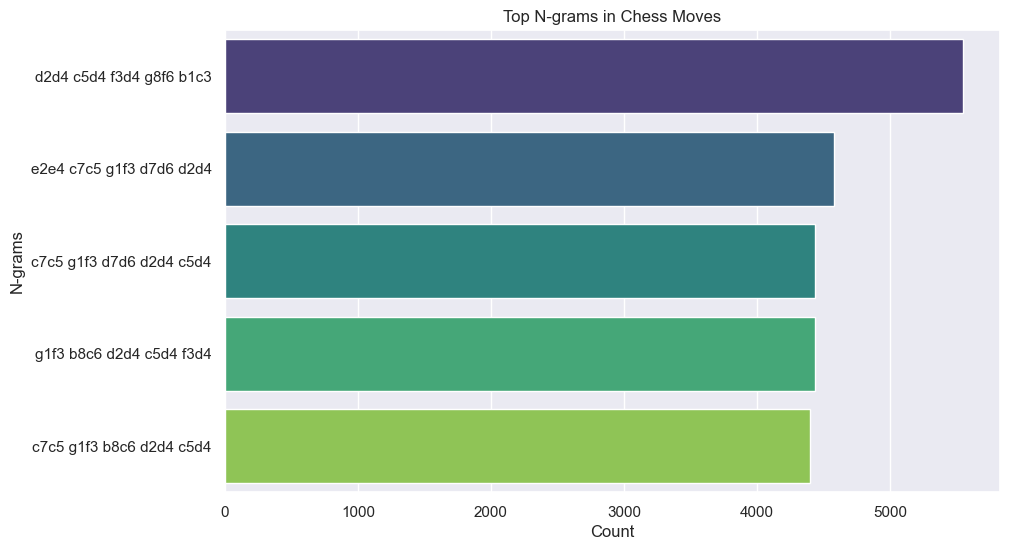

In [43]:
# visualize the n-grams

def plot_ngrams(ngrams: List[Tuple[Tuple[str], int]]) -> None:
    ngram_labels = [' '.join(ngram) for ngram, _ in ngrams]
    counts = [count for _, count in ngrams]

    plt.figure(figsize=(10, 6))
    sns.barplot(x=counts, y=ngram_labels, palette='viridis')
    plt.xlabel('Count')
    plt.ylabel('N-grams')
    plt.title('Top N-grams in Chess Moves')
    plt.show()

plot_ngrams(top_ngrams)

Let's see if some of the famous openings are in the top n-grams (respectively to their lenght)

In [44]:
famous_openings = {
    "Ruy Lopez (Spanish Opening)": ["e2e4", "e7e5", "g1f3", "b8c6", "f1b5"],
    "Italian Game": ["e2e4", "e7e5", "g1f3", "b8c6", "f1c4"],
    "Sicilian Defense": ["e2e4", "c7c5"],
    "Open Sicilian": ["e2e4", "c7c5", "g1f3", "d7d6", "d2d4", "c5d4", "f3d4"],
    "French Defense": ["e2e4", "e7e6"],
    "Caro-Kann Defense": ["e2e4", "c7c6"],
    "Queen's Gambit": ["d2d4", "d7d5", "c2c4"],
    "King's Indian Defense": ["d2d4", "g8f6", "c2c4", "g7g6"],
    "Slav Defense": ["d2d4", "d7d5", "c2c4", "c7c6"],
    "Scandinavian Defense": ["e2e4", "d7d5"],
    "English Opening": ["c2c4"],
    "King's Gambit": ["e2e4", "e7e5", "f2f4"],
    "Nimzo-Indian Defense": ["d2d4", "g8f6", "c2c4", "e7e6", "b1c3", "f8b4"],
}


In [45]:
#famous openings to df
def openings_to_df(openings: dict) -> pd.DataFrame:
    data = []
    for opening, moves in openings.items():
        data.append({"Opening": opening, "Moves": ' '.join(moves)})
    return pd.DataFrame(data)

openings_df = openings_to_df(famous_openings)
print(openings_df)

                        Opening                               Moves
0   Ruy Lopez (Spanish Opening)            e2e4 e7e5 g1f3 b8c6 f1b5
1                  Italian Game            e2e4 e7e5 g1f3 b8c6 f1c4
2              Sicilian Defense                           e2e4 c7c5
3                 Open Sicilian  e2e4 c7c5 g1f3 d7d6 d2d4 c5d4 f3d4
4                French Defense                           e2e4 e7e6
5             Caro-Kann Defense                           e2e4 c7c6
6                Queen's Gambit                      d2d4 d7d5 c2c4
7         King's Indian Defense                 d2d4 g8f6 c2c4 g7g6
8                  Slav Defense                 d2d4 d7d5 c2c4 c7c6
9          Scandinavian Defense                           e2e4 d7d5
10              English Opening                                c2c4
11                King's Gambit                      e2e4 e7e5 f2f4
12         Nimzo-Indian Defense       d2d4 g8f6 c2c4 e7e6 b1c3 f8b4


In [46]:
# Save them into df

ngrams_df = pd.DataFrame(columns=['N', 'N-gram', 'Count'])
for i in range(1, 8):
    ngrams = most_common_ngrams(moves, n=i, top_k=5)
    temp_df = pd.DataFrame([(i, ' '.join(ngram), count) for ngram, count in ngrams], columns=['N', 'N-gram', 'Count'])
    ngrams_df = pd.concat([ngrams_df, temp_df], ignore_index=True)


In [47]:
ngrams_df

,N,N-gram,Count
0,1,d2d4,93664
1,1,g1f3,92118
2,1,g8f6,91425
3,1,g7g6,88199
4,1,e8g8,83411
5,2,d2d4 g8f6,24581
6,2,e2e4 c7c5,21343
7,2,d2d4 d7d5,18727
8,2,c7c5 g1f3,18162
9,2,g8f6 c2c4,18159


Let's check if the n-grams represent famous openings

In [48]:
#check if the openings are in the ngrams
def check_openings_in_ngrams(openings: dict, ngrams: pd.DataFrame) -> pd.DataFrame:
    openings_list = []
    for opening, moves in openings.items():
        moves_str = ' '.join(moves)
        if ngrams['N-gram'].str.contains(moves_str).any():
            openings_list.append({"Opening": opening, "Moves": moves_str})
    return pd.DataFrame(openings_list)

In [49]:
openings_in_ngrams_df = check_openings_in_ngrams(famous_openings, ngrams_df)

In [50]:
print("Openings in N-grams:")
print(openings_in_ngrams_df['Opening'].unique())

Openings in N-grams:
['Sicilian Defense' 'Open Sicilian' 'English Opening']
